## Loading images from directory as dataset

In [12]:
import keras
from keras.preprocessing.image import ImageDataGenerator
train_generator = ImageDataGenerator(rescale=1/255, shear_range=0.2, zoom_range=0.2)
data_generator = ImageDataGenerator(rescale=1/255)

train_ds = train_generator.flow_from_directory(
    directory="./train",
    target_size = (100, 100),
    class_mode="categorical",
    batch_size=32
)

validation_ds = data_generator.flow_from_directory(
    directory="./val",
    target_size = (100, 100),
    class_mode="categorical",
    batch_size=32
)

Found 2356 images belonging to 62 classes.
Found 1054 images belonging to 62 classes.


## Building CNN model

In [13]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout, Activation, BatchNormalization


In [14]:
from keras.applications.vgg16 import VGG16

In [15]:
# Create a pre-trained VGG16 model object without the fully-connected layers
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(100, 100, 3))

# Freeze the pre-trained layers in the VGG16 model
# for layer in vgg_model.layers:
#     layer.trainable = False

# # Create a Sequential model and add the pre-trained VGG16 model layers
# model = Sequential()
# for layer in vgg_model.layers:
#     model.add(layer)


In [16]:
vgg_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 100, 100, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 100, 100, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 100, 100, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 50, 50, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 50, 50, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 50, 50, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 25, 25, 128)       0     

##VGG NET

In [17]:
# Define the VGGNet model
model = Sequential()
# model.add(Conv2D(64, (3, 3), input_shape=(100, 100, 3), padding='same', activation='relu'))
# model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
# model.add(MaxPool2D(pool_size=(2, 2)))

# model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
# model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
# model.add(MaxPool2D(pool_size=(2, 2)))

# model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
# model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
# model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
# model.add(MaxPool2D(pool_size=(2, 2)))

# model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
# model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
# model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
# model.add(MaxPool2D(pool_size=(2, 2)))

# model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
# model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
# model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
# model.add(MaxPool2D(pool_size=(2, 2)))

model.add(vgg_model)
model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(62, activation='softmax'))

# Compile the model
# model.compile(loss='binary_crossentropy',
#               optimizer='adam',
#               metrics=['accuracy'])

# # Train the model
# model.fit(train_ds, batch_size=32, epochs=50)

In [18]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 3, 3, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 4608)              0         
                                                                 
 dense_3 (Dense)             (None, 4096)              18878464  
                                                                 
 dropout_2 (Dropout)         (None, 4096)              0         
                                                                 
 dense_4 (Dense)             (None, 4096)              16781312  
                                                                 
 dropout_3 (Dropout)         (None, 4096)              0         
                                                                 
 dense_5 (Dense)             (None, 62)               

In [19]:
vgg_model.trainable = False

In [20]:
from keras import optimizers

In [21]:
model.compile(
    optimizers.RMSprop(learning_rate=0.001),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

##Train/Fit The model

In [9]:
from keras.callbacks import EarlyStopping
callback = EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=0,
    verbose=1,
    mode='auto',
    baseline=None,
    restore_best_weights=False
)

In [25]:
epochs_range = 100
# Train the model
history = model.fit(train_ds, batch_size=32, 
                    epochs=epochs_range,callbacks=None,
                    validation_data=validation_ds
                    )

Epoch 1/100
74/74 [==============================] - 92s 1s/step - loss: 1.1558 - accuracy: 0.6426 - val_loss: 0.8144 - val_accuracy: 0.7486
Epoch 2/100
74/74 [==============================] - 96s 1s/step - loss: 1.2038 - accuracy: 0.6418 - val_loss: 0.7489 - val_accuracy: 0.7562
Epoch 3/100
74/74 [==============================] - 1263s 17s/step - loss: 1.1433 - accuracy: 0.6558 - val_loss: 0.8027 - val_accuracy: 0.7609
Epoch 4/100
74/74 [==============================] - 92s 1s/step - loss: 1.0628 - accuracy: 0.6859 - val_loss: 0.7574 - val_accuracy: 0.7552
Epoch 5/100
74/74 [==============================] - 100s 1s/step - loss: 1.0693 - accuracy: 0.6838 - val_loss: 0.7694 - val_accuracy: 0.7524
Epoch 6/100
74/74 [==============================] - 105s 1s/step - loss: 1.0729 - accuracy: 0.6825 - val_loss: 0.6184 - val_accuracy: 0.8074
Epoch 7/100
74/74 [==============================] - 108s 1s/step - loss: 0.9922 - accuracy: 0.6927 - val_loss: 0.6815 - val_accuracy: 0.7903
Epoch 8

##Plot the result

In [26]:
import matplotlib.pyplot as plt

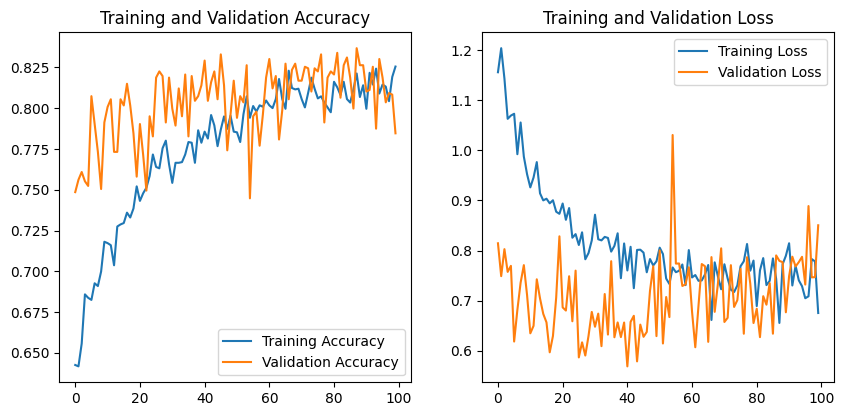

In [27]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.plot(range(len(acc)), acc, label='Training Accuracy')
plt.plot(range(len(val_acc)), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(range(len(loss)), loss, label='Training Loss')
plt.plot(range(len(val_loss)), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

##Save the model

In [28]:
# Save the model as model.h5
model.save('model_transfer.h5')

In [29]:
# Print the class indices 
print("Prediction Dict: ", train_ds.class_indices)

Prediction Dict:  {'0': 0, '1': 1, '10': 2, '11': 3, '12': 4, '13': 5, '14': 6, '15': 7, '16': 8, '17': 9, '18': 10, '19': 11, '2': 12, '20': 13, '21': 14, '22': 15, '23': 16, '24': 17, '25': 18, '26': 19, '27': 20, '28': 21, '29': 22, '3': 23, '30': 24, '31': 25, '32': 26, '33': 27, '34': 28, '35': 29, '36': 30, '37': 31, '38': 32, '39': 33, '4': 34, '40': 35, '41': 36, '42': 37, '43': 38, '44': 39, '45': 40, '46': 41, '47': 42, '48': 43, '49': 44, '5': 45, '50': 46, '51': 47, '52': 48, '53': 49, '54': 50, '55': 51, '56': 52, '57': 53, '58': 54, '59': 55, '6': 56, '60': 57, '61': 58, '7': 59, '8': 60, '9': 61}
